# C1 - Introduction to Human and Computer Vision
## Week 3

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
import matplotlib.pyplot as plt

# Get project's root directory
BASE_PATH = os.path.join(re.search(r'.+(Team5)', os.getcwd())[0], 'week3')
os.chdir(BASE_PATH)
BASE_PATH

DATA_DIRECTORY = '../data'

### Load datasets

In [3]:
from src.image_dataset import ImageDataset, ColorSpace
from src.consts import DescriptorType

DATA_DIRECTORY = '../data'

params = {
    'colorspace': ColorSpace.CieLab,
    'intervals': [7, 7, 7],
    'rows': 12,
    'columns': 12,
    'channels': [[0], [1], [2]]
}

# BDDataset = ImageDataset(f'{DATA_DIRECTORY}/BBDD', DescriptorType.Block, params)

### Task 1 - Filter noise

In [10]:
QSD1_W3_noise = ImageDataset(f'{DATA_DIRECTORY}/qsd1_w3', DescriptorType.Block, params)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 35.02it/s]


In [11]:
import cv2
import importlib
import matplotlib.pyplot as plt

import src.noise_removal
importlib.reload(src.noise_removal)
from src.noise_removal import PSNR, SSIM

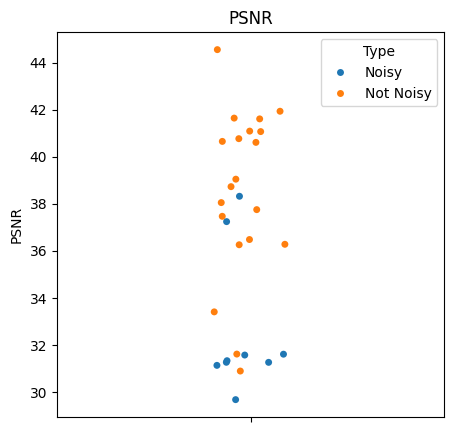

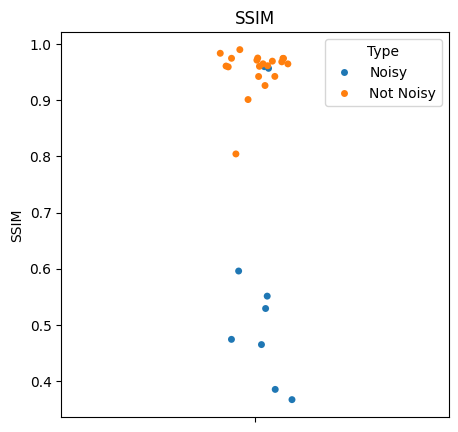

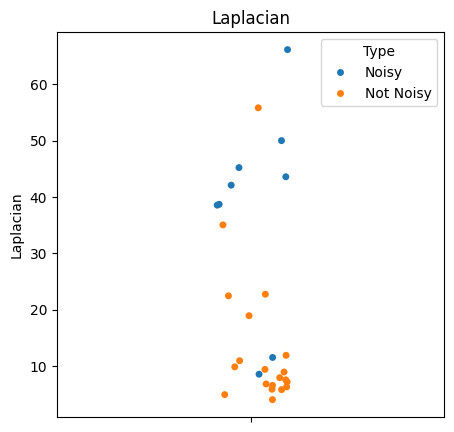

In [12]:
# Check three denoising image with kernel and compute PSNR and SSIM
# + Compute Laplacian and compute different mean

import numpy as np
import seaborn as sns

qsd1_w3_noisy_images = [5, 6, 16, 18, 20, 23, 29]
qsd1_w3_not_noisy_images = [1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 21, 22, 24, 25, 26, 27, 28]

results_noisy = [[], [], []]
for idx in qsd1_w3_noisy_images:
    image = QSD1_W3_noise[idx].original_image
    modified_image = cv2.medianBlur(image, 3)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    psnr = PSNR(image, modified_image)
    ssim = SSIM(image, modified_image)

    results_noisy[0].append(psnr)
    results_noisy[1].append(ssim)
    results_noisy[2].append(np.mean(np.abs(laplacian)))
    

results_not_noisy = [[], [], []]
for idx in qsd1_w3_not_noisy_images:
    image = QSD1_W3_noise[idx].original_image
    modified_image = cv2.medianBlur(image, 3)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    psnr = PSNR(image, modified_image)
    ssim = SSIM(image, modified_image)

    results_not_noisy[0].append(psnr)
    results_not_noisy[1].append(ssim)
    results_not_noisy[2].append(np.mean(np.abs(laplacian)))

# Prepare data for seaborn
data_psnr = {
    'Type': ['Noisy'] * len(results_noisy[0]) + ['Not Noisy'] * len(results_not_noisy[0]),
    'PSNR': results_noisy[0] + results_not_noisy[0]
}

data_ssim = {
    'Type': ['Noisy'] * len(results_noisy[1]) + ['Not Noisy'] * len(results_not_noisy[1]),
    'SSIM': results_noisy[1] + results_not_noisy[1]
}

data_laplacian = {
    'Type': ['Noisy'] * len(results_noisy[2]) + ['Not Noisy'] * len(results_not_noisy[2]),
    'Laplacian': results_noisy[2] + results_not_noisy[2]
}

# Convert to DataFrame for Seaborn
import pandas as pd
df_psnr = pd.DataFrame(data_psnr)
df_ssim = pd.DataFrame(data_ssim)
df_laplacian = pd.DataFrame(data_laplacian)

# Plot PSNR and SSIM
plt.figure(figsize=(5, 5))
sns.stripplot(data=df_psnr, y="PSNR", hue="Type")
plt.title('PSNR')
plt.show()

plt.figure(figsize=(5, 5))
sns.stripplot(data=df_ssim, y="SSIM", hue="Type")
plt.title('SSIM')
plt.show()

plt.figure(figsize=(5, 5))
sns.stripplot(data=df_laplacian, y="Laplacian", hue="Type")
plt.title('Laplacian')
plt.show()


- Median Blur looks to work pretty good for the dataset noisy images (most of them look to have salt-and-pepper)

- Also, a 3x3 kernel size works better than a 5x5, as the 5x5 smoothes way too much the image.

- We are also able to see that, for the qsd1_w3 dataset, the highest PSNR of an image WITH NOISE is 31.602 & SSIM  0.596, therefore we can set a threshold around SSIM 0.7.

### Task 2 - Texture descriptors

### LBP

In [6]:
import src.descriptors.image_lbp_descriptor
import importlib
importlib.reload(src.descriptors.image_lbp_descriptor)
from src.image_dataset import ImageDataset, ColorSpace
from src.image import Image
from src.consts import DescriptorType
import os
import re
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy


In [46]:
params = {
    'colorspace': ColorSpace.gray,
    'rows': 2,
    'columns': 2,
    'channels': [[0]],
    'radius': 2
}

QSD1_W3 = ImageDataset(f'{DATA_DIRECTORY}/qsd1_w3', DescriptorType.LBP, params)
BDDataset = ImageDataset(f'{DATA_DIRECTORY}/BBDD', DescriptorType.LBP, params)


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [14]:
# Read the ground truth pickle file

import pickle

with open(f'{DATA_DIRECTORY}/qsd1_w3/gt_corresps.pkl', 'rb') as f:
    ground_truth = pickle.load(f)

In [45]:
from src.evaluation import compute_results_by_distance, compute_results_by_similarity
from src.metrics import DistanceType, SimilarityType


res = compute_results_by_similarity(
    BDDataset,
    QSD1_W3,
    ground_truth,
    SimilarityType.bhattacharyya
)

print('mapk1', np.mean(res['apk1']))
print('mapk5', np.mean(res['apk5']))

mapk1 0.3
mapk5 0.31777777777777777


In [43]:
np.mean(QSD1_W3[1].compute_distance(BDDataset[280], DistanceType.l1))

np.float32(0.25908712)

### DCT

In [142]:
from src.image_dataset import ImageDataset, ColorSpace
from src.consts import DescriptorType
# Read the ground truth pickle file
import pickle

with open(f'{DATA_DIRECTORY}/qsd1_w3/gt_corresps.pkl', 'rb') as f:
    ground_truth = pickle.load(f)

params = {
    'colorspace': ColorSpace.gray,
    'N': 1000,
    'rows': 1,
    'columns': 1,
    'image_size': (256, 256)
}

results = {}
for image_size in [128]:
    for N in [500]:
        print(f'Processing image size {image_size} and N {N}')
        params['N'] = N
        params['image_size'] = (image_size, image_size)
        QSD1_W3 = ImageDataset(f'{DATA_DIRECTORY}/qsd1_w3', DescriptorType.DCT, params)
        BDDataset = ImageDataset(f'{DATA_DIRECTORY}/BBDD', DescriptorType.DCT, params)

        res = compute_results_by_distance(
            BDDataset,
            QSD1_W3,
            ground_truth,
            DistanceType.l1
        )

        # Store the results
        print('mapk1', np.mean(res['apk1']))
        print('mapk5', np.mean(res['apk5']))
        results[(image_size, N)] = {
            'mapk1': np.mean(res['apk1']),
            'mapk5': np.mean(res['apk5'])
        }


Processing image size 128 and N 500


100%|██████████| 287/287 [00:05<00:00, 49.29it/s]


mapk1 0.9666666666666667
mapk5 0.9666666666666667


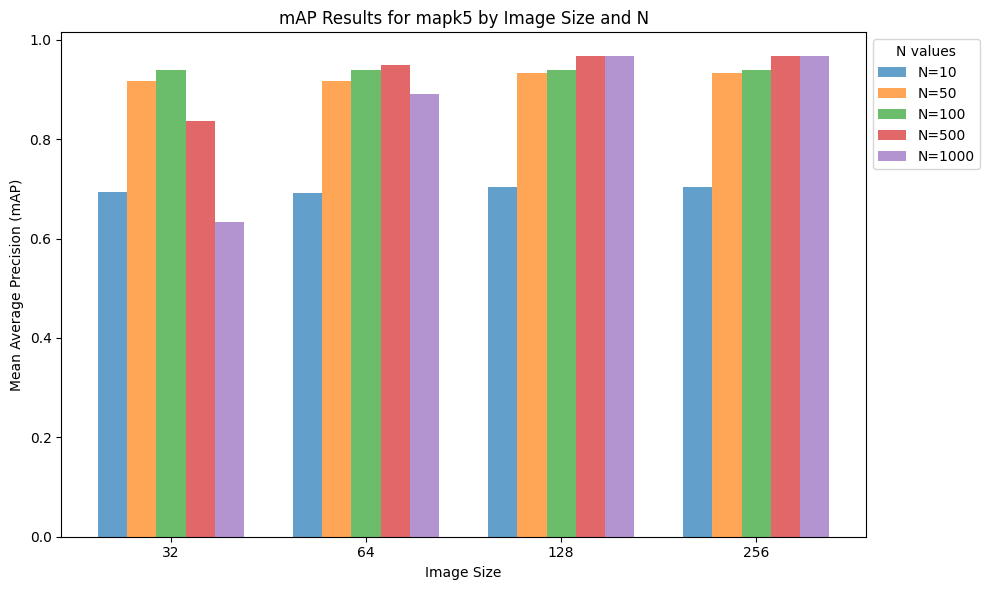

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare data for plotting
image_sizes = sorted(set(key[0] for key in results.keys()))
Ns = sorted(set(key[1] for key in results.keys()))

# Extract mean values for mapk5
mapk5_values = []

for image_size in image_sizes:
    mapk5_row = []
    for N in Ns:
        if (image_size, N) in results:
            mapk5_row.append(results[(image_size, N)]['mapk5'])
        else:
            mapk5_row.append(0)  # or np.nan if you prefer
    mapk5_values.append(mapk5_row)

# Convert to numpy array for easier plotting
mapk5_values = np.array(mapk5_values)

# Set up bar positions
bar_width = 0.15  # Set a reasonable bar width
x = np.arange(len(image_sizes))

# Create a bar plot for mapk5
fig, ax = plt.subplots(figsize=(10, 6))

# Plot mapk5 with reduced within-group spacing
for i in range(len(Ns)):
    ax.bar(x + i * bar_width, mapk5_values[:, i], bar_width, label=f'N={Ns[i]}', alpha=0.7)

# Customize the plot
ax.set_xlabel('Image Size')
ax.set_ylabel('Mean Average Precision (mAP)')
ax.set_title('mAP Results for mapk5 by Image Size and N')
ax.set_xticks(x + bar_width * (len(Ns) - 1) / 2)  # Center the x-ticks
ax.set_xticklabels(image_sizes)
ax.legend(title='N values', bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [139]:
# Does it work well with RGB?

params = {
    'colorspace': ColorSpace.CieLab,
    'N': 500,
    'rows': 1,
    'columns': 1,
    'image_size': (128, 128)
}

QSD1_W3 = ImageDataset(f'{DATA_DIRECTORY}/qsd1_w3', DescriptorType.DCT, params)
BDDataset = ImageDataset(f'{DATA_DIRECTORY}/BBDD', DescriptorType.DCT, params)

res = compute_results_by_distance(
    BDDataset,
    QSD1_W3,
    ground_truth,
    DistanceType.l1
)

print('mapk1', np.mean(res['apk1']))
print('mapk5', np.mean(res['apk5']))

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 287/287 [00:06<00:00, 47.19it/s]


mapk1 0.7
mapk5 0.775


### Task 3 - Background removal (max 2 paintings per image)

### Task 4 - Retrieval system

In [74]:
import pickle

# Get ground truth
with open(f'{DATA_DIRECTORY}/qsd1_w1/gt_corresps.pkl', 'rb') as f:
    ground_truth = pickle.load(f)

In [75]:
from src.evaluation import compute_results_by_similarity, compute_results_by_distance
from src.metrics import SimilarityType, DistanceType
import numpy as np

metric = DistanceType.l1

res = compute_results_by_distance(
    BDDataset, QueryDataset, ground_truth, metric,
)

result = {}
result[metric.__name__] = {
    'mapk1': np.mean(res['apk1']),
    'mapk5': np.mean(res['apk5'])
}

print(result)

{'l1_distance': {'mapk1': np.float64(0.9), 'mapk5': np.float64(0.9166666666666666)}}


### Task 5 - .pkl results generation

In [76]:
TestDataset = ImageDataset(f'{DATA_DIRECTORY}/qst_w2/w2/qst1_w2/', DescriptorType.Block, params)

In [78]:
result = []
for image in TestDataset:
    distnaces_list = []
    for image2 in BDDataset:
        distnaces = image.compute_distance(image2, type=DistanceType.l1)
        distance = np.mean(distnaces)
        distnaces_list.append(distance)
    top_k = np.argsort(distnaces_list)[:10]

    result.append([BDDataset[i].index for i in top_k])

In [79]:
result

[[35, 194, 212, 205, 252, 40, 270, 226, 97, 16],
 [131, 110, 121, 240, 128, 173, 213, 231, 46, 180],
 [91, 51, 225, 117, 187, 58, 146, 215, 184, 85],
 [182, 85, 97, 184, 226, 212, 165, 35, 224, 187],
 [222, 194, 120, 205, 35, 252, 187, 40, 226, 211],
 [260, 286, 248, 21, 26, 279, 84, 123, 133, 57],
 [117, 217, 5, 73, 146, 106, 21, 68, 213, 162],
 [78, 147, 248, 227, 155, 84, 99, 140, 65, 253],
 [257, 21, 138, 57, 197, 106, 258, 46, 279, 217],
 [218, 110, 240, 231, 216, 173, 128, 157, 133, 180],
 [67, 182, 184, 85, 97, 38, 114, 224, 35, 165],
 [132, 130, 192, 225, 88, 103, 113, 58, 215, 51],
 [25, 104, 200, 29, 145, 154, 163, 42, 143, 105],
 [212, 270, 85, 194, 97, 148, 165, 5, 187, 1],
 [34, 173, 216, 197, 162, 240, 238, 128, 254, 21],
 [176, 29, 200, 12, 105, 16, 60, 24, 95, 205],
 [150, 95, 93, 176, 16, 205, 12, 200, 271, 187],
 [85, 254, 187, 92, 226, 79, 224, 165, 110, 157],
 [22, 205, 16, 12, 93, 211, 14, 1, 194, 252],
 [36, 106, 258, 49, 217, 162, 18, 5, 35, 209],
 [248, 205, 244

In [80]:
with open(f'./data_results/result.pkl', 'wb') as file:
    # Use pickle.dump to write the list to the file
    pickle.dump(result, file)

In [81]:
TestDataset = ImageDataset(f'{DATA_DIRECTORY}/qst_w2/w2/qst2_w2/qst2_w1', DescriptorType.Block, params)

In [82]:
for image in TestDataset:
    _, mask = get_mask_and_foreground(image.descriptors.original_image)
    image.descriptors.compute_image_histogram_descriptor(
        params['intervals'],
        params['rows'],
        params['columns'],
        params['channels'],
        mask=mask)

In [85]:
result = []
for image in TestDataset:
    distnaces_list = []
    for image2 in BDDataset:
        distnaces = image.compute_distance(image2, type=DistanceType.l1)
        distance = np.mean(distnaces)
        distnaces_list.append(distance)
    top_k = np.argsort(distnaces_list)[:10]

    result.append([BDDataset[i].index for i in top_k])

In [86]:
result

[[35, 197, 217, 146, 208, 21, 68, 106, 258, 11],
 [276, 176, 22, 281, 12, 261, 74, 152, 92, 95],
 [85, 224, 187, 97, 165, 146, 184, 182, 226, 79],
 [35, 68, 197, 226, 217, 5, 21, 79, 41, 273],
 [212, 35, 187, 226, 40, 68, 18, 41, 165, 217],
 [286, 57, 271, 21, 116, 72, 225, 241, 126, 103],
 [85, 187, 79, 224, 184, 226, 41, 146, 217, 165],
 [217, 173, 106, 127, 240, 216, 21, 190, 73, 46],
 [176, 105, 29, 200, 95, 12, 150, 93, 60, 205],
 [110, 57, 225, 271, 218, 187, 146, 46, 241, 259],
 [179, 219, 240, 254, 127, 173, 216, 128, 238, 231],
 [225, 130, 31, 160, 72, 110, 163, 215, 113, 127],
 [93, 187, 95, 12, 191, 137, 195, 149, 150, 42],
 [231, 110, 240, 216, 123, 21, 121, 57, 46, 128],
 [183, 15, 118, 133, 46, 21, 139, 138, 174, 221],
 [81, 244, 218, 82, 110, 37, 150, 105, 271, 281],
 [286, 225, 170, 57, 146, 130, 187, 46, 21, 271],
 [130, 58, 225, 215, 192, 132, 160, 51, 161, 239],
 [187, 205, 203, 93, 150, 16, 46, 271, 146, 110],
 [227, 57, 133, 121, 157, 110, 218, 26, 244, 84],
 [257,

In [87]:
with open(f'./data_results/result.pkl', 'wb') as file:
    # Use pickle.dump to write the list to the file
    pickle.dump(result, file)